# **Syntactic Processing & PoS Tagging**

Heteronyms are the words that have same spelling but mean different things when pronounced differently.

Recall the word lead from the lectures. It can refer to the metal lead or the act of leadership. The two pronounciations have different meanings.

For machine translation systems or text to speech systems, the ability to identify the correct sense of the word is crucial.

Let us have a look at this example:

https://translate.google.com/?sl=en&tl=hi&text=She%20wished%20she%20could%20desert%20him%20in%20the%20desert.%0A&op=translate

Example taken from: http://www-personal.umich.edu/~cellis/heteronym.html

In [1]:
# Import SpaCy library
import spacy

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Load pre-trained SpaCy model for performing basic 
# NLP tasks such as POS tagging, parsing, etc.
model = spacy.load("en_core_web_sm")

In [3]:
#Use the model to process the input sentence
tokens = model("She wished she could desert him in the desert.")

In [4]:
# Print the tokens and their respective PoS tags.
for token in tokens:
    print(token.text, "--", token.pos_, "--", token.tag_)

She -- PRON -- PRP
wished -- VERB -- VBD
she -- PRON -- PRP
could -- AUX -- MD
desert -- VERB -- VB
him -- PRON -- PRP
in -- ADP -- IN
the -- DET -- DT
desert -- NOUN -- NN
. -- PUNCT -- .


Note here that in the above example, the two instances of desert have different PoS tags and hence, the text to speech system can use this information to generate the correct pronounciation.

The above task is a specific example of the larger NLP problem called Word Sense Disambiguation (WSD). For words that have more than one meaning, WSD is the problem of identifying the correct meaning of the word based on the context in which the word is used.

Note that this technique will not work when the different meanings have the same PoS tags.

https://translate.google.com/?sl=en&tl=hi&text=The%20bass%20swam%20around%20the%20bass%20drum%20on%20the%20ocean%20floor.&op=translate

In [5]:
# Let's take a new example.
tokens = model("The bass swam around the bass drum on the ocean floor")
for token in tokens:
    print(token.text, "--", token.pos_, "--", token.tag_)

The -- DET -- DT
bass -- NOUN -- NN
swam -- NOUN -- NN
around -- ADP -- IN
the -- DET -- DT
bass -- NOUN -- NN
drum -- NOUN -- NN
on -- ADP -- IN
the -- DET -- DT
ocean -- NOUN -- NN
floor -- NOUN -- NN


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os

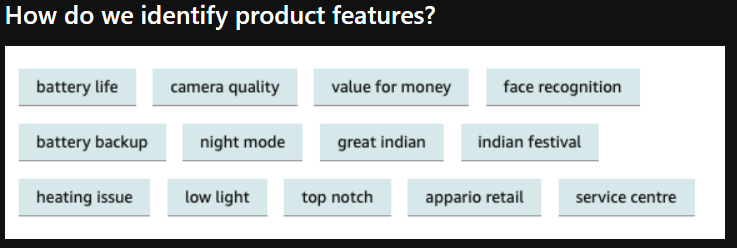

In [7]:
sent1 = "I loved the screen on this phone."
sent2 = "The battery life on this phone is great."
sent3 = "The speakers are pathetic."

## Lets do a POS parse and see if we can figure out some patterns.

In [8]:
model = spacy.load("en_core_web_sm")

In [9]:
sentence1 = model(sent1)

In [10]:
# Print the PoS tag of sent1
for token in sentence1:
    print(token.text, "--", token.pos_, "--", token.tag_)

I -- PRON -- PRP
loved -- VERB -- VBD
the -- DET -- DT
screen -- NOUN -- NN
on -- ADP -- IN
this -- DET -- DT
phone -- NOUN -- NN
. -- PUNCT -- .


In [11]:
# Print the PoS tag of sent2
sentence2 = model(sent2)

In [12]:
for token in sentence2:
    print(token.text, "--", token.pos_, "--", token.tag_)

The -- DET -- DT
battery -- NOUN -- NN
life -- NOUN -- NN
on -- ADP -- IN
this -- DET -- DT
phone -- NOUN -- NN
is -- AUX -- VBZ
great -- ADJ -- JJ
. -- PUNCT -- .


In [13]:
# Print the PoS tag of sent3
sentence3 = model(sent3)

In [14]:
for token in sentence3:
    print(token.text, "--", token.pos_,"--", token.tag_)

The -- DET -- DT
speakers -- NOUN -- NNS
are -- AUX -- VBP
pathetic -- ADJ -- JJ
. -- PUNCT -- .


#### Product features such as screen, battery, speaker have a POS tag of NOUN

**Summary:**
* Product features such as screen, battery and speaker have a POS tag of Noun
* If we can find the frequency count of all the nouns in our data, then by looking at top-n nouns we can find out what product features people are talking about
* Check hypothesis on a real world dataset

## **Samsung Data Review:**

In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
# Load the Samsung.txt dataset
con=open("/kaggle/input/samsungtxt/Samsung.txt",'r', encoding="utf-8")
samsung_reviews=con.read()
con.close()

In [17]:
len(samsung_reviews.split("\n"))

46355

#### Dataset is a text file where each review is in a new line

In [18]:
samsung_reviews.split("\n")[0:4]

["I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!",
 'nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung',
 'Very pleased',
 'It works good but it goes slow sometimes but its a very good phone I love it']

#### Will our hypothesis hold on real world data? Product features---POS_NOUN

In [19]:
review1=samsung_reviews.split("\n")[0]
review1=nlp(review1)
review1

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!

#### Lets do nlp parse on part of one review in our dataset

In [20]:
for tok in review1[0:10]:
    print(tok.text, '--', tok.lemma_,'--', tok.pos_)

I -- I -- PRON
feel -- feel -- VERB
so -- so -- ADV
LUCKY -- LUCKY -- NOUN
to -- to -- PART
have -- have -- AUX
found -- find -- VERB
this -- this -- DET
used -- use -- VERB
( -- ( -- PUNCT


#### Real world data is usually messy, observe the words found and used

In [21]:
pos = []
lemma = []
text = []

for tok in review1:
    pos.append(tok.pos_)
    lemma.append(tok.lemma_)
    text.append(tok.text)

In [22]:
nlp_table =  pd.DataFrame({"Text": text , "Lemma": lemma, "PoS": pos})
nlp_table

,Text,Lemma,PoS
0,I,I,PRON
1,feel,feel,VERB
2,so,so,ADV
3,LUCKY,LUCKY,NOUN
4,to,to,PART
...,...,...,...
81,from,from,ADP
82,them,they,PRON
83,again,again,ADV
84,!,!,PUNCT


In [23]:
## Get most frequent lemma forms of nouns
nlp_table[nlp_table['PoS'] == 'NOUN']['Lemma'].value_counts()

phone      3
one        2
LUCKY      1
line       1
year       1
upgrade    1
honesty    1
re         1
seller     1
Name: Lemma, dtype: int64

#### It seems possible that if we extract all the nouns from the reviews and look at the top 5 most frequent lemmatised noun forms, we will be able to identify What people are talking about?

#### Lets repeat this experiment on a larger set of reviews

In [24]:
noun = []

for review in samsung_reviews.split("\n")[0:100]:
    doc = nlp(review)
    for tok in doc:
        if tok.pos_ == 'NOUN':
            noun.append(tok.lemma_.lower())
            

pd.Series(noun).value_counts().head()

phone        111
price         12
problem       11
condition     10
seller        10
dtype: int64

#### Lets add some way of keeping track of time

In [25]:
from tqdm import tqdm

noun = []

for review in samsung_reviews.split("\n")[0:1000]:
    doc = nlp(review)
    for tok in doc:
        if tok.pos_ == 'NOUN':
            noun.append(tok.lemma_.lower())
            

pd.Series(noun).value_counts().head()

phone      1216
time         90
battery      90
screen       87
price        87
dtype: int64

In [26]:
len(samsung_reviews.split("\n"))

46355

**Summary:**

* POS tag based rule seems to be working well
* We need to figure out a way to reduce the time taken to process reviews

### Can we reduce the time taken?

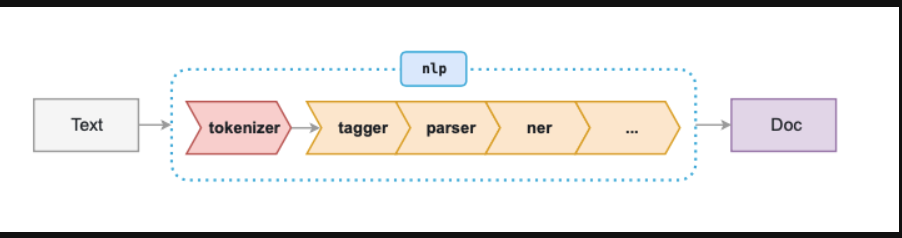

In [27]:
nlp=spacy.load('en_core_web_sm',disable=['parser','ner'])

In [28]:
from tqdm import tqdm

noun = []

for review in samsung_reviews.split("\n")[0:1000]:
    doc = nlp(review)
    for tok in doc:
        if tok.pos_ == 'NOUN':
            noun.append(tok.lemma_.lower())
            

pd.Series(noun).value_counts().head()

phone      1216
time         90
battery      90
screen       87
price        87
dtype: int64

#### Lets process all the reviews now and see if time taken is less !!!

In [29]:
noun = []

for review in samsung_reviews.split("\n"):
    doc = nlp(review)
    for tok in doc:
        if tok.pos_ == 'NOUN':
            noun.append(tok.lemma_.lower())
            

pd.Series(noun).value_counts().head()

phone      43507
battery     4334
product     3992
screen      3838
time        3810
dtype: int64

#### Does the hypothesis of nouns capturing `product features`hold?

In [30]:
nouns = pd.Series(noun)
nouns.value_counts().head()

phone      43507
battery     4334
product     3992
screen      3838
time        3810
dtype: int64

In [31]:
nouns.value_counts().head(10)

phone      43507
battery     4334
product     3992
screen      3838
time        3810
card        3384
price       3149
problem     3137
camera      2936
app         2593
dtype: int64

##### We now know that people mention `battery, product, screen` etc. But we still don't know in what context they mention these keywords

**Summary:**

* Most frequently used lemmatised forms of noun, inform us about the product features people are talking about in product reviews
* In order to process the review data faster spacy allows us to use the idea of enabling parts of model inference pipeline via spacy.loads() command and disable parameter

### We can use a simple hueristic

* Find out what were the most common words that appeared before and after each mention of product feature
* Use regex pattern to extract this information

In [32]:
import re
s1 = "The Battery Was Great"

The `battery` was ===> `Prefix` keyword Suffix

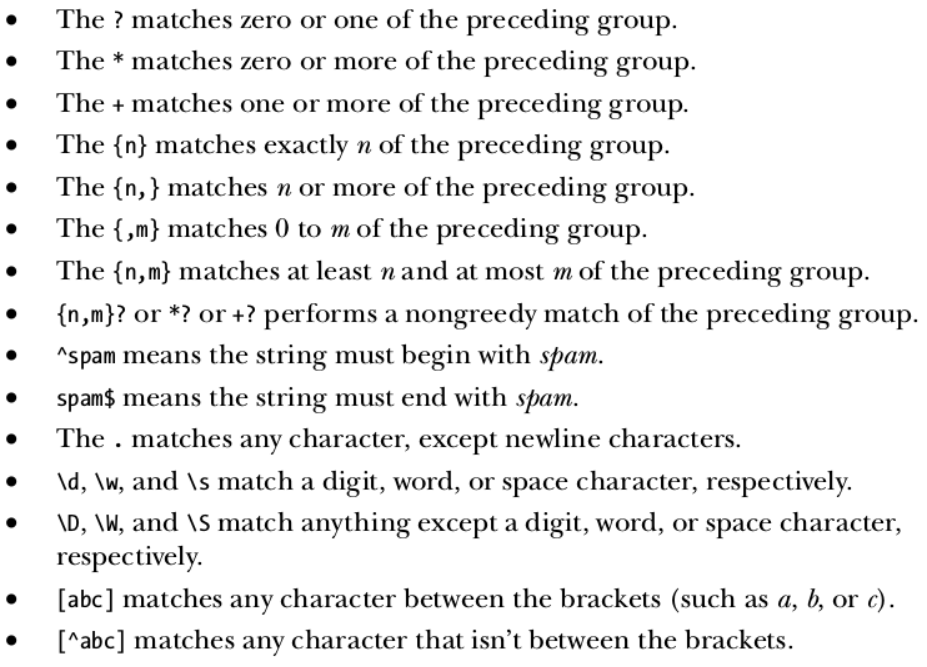

#### Extract all the prefixes and suffixes of battery

In [33]:
pattern = re.compile("\w+\sbattery\s\w+")

In [34]:
prefixes_suffixes = re.findall(pattern,samsung_reviews)

In [35]:
prefixes_suffixes[0:10]

['that battery life',
 'The battery was',
 'great battery life',
 'removable battery or',
 'the battery in',
 'The battery was',
 'the battery is',
 'Excellent battery life',
 'the battery off',
 'the battery goes']

In [36]:
prefixes_suffixes[0].split(" ")

['that', 'battery', 'life']

In [37]:
prefixes = []
suffixes = []
for p in prefixes_suffixes:
    l = p.split(" ")
    prefixes.append(l[0].lower())
    suffixes.append(l[-1].lower())

In [38]:
pd.Series(prefixes).value_counts().head(5)

the      1396
good      122
great      90
and        82
long       60
dtype: int64

In [39]:
pd.Series(suffixes).value_counts().head(5)

life     1052
is        210
and       146
lasts      83
was        66
dtype: int64

#### This doesn't make much sense as these are commonly used words. Let's remove stopwords and see what we get

In [40]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [41]:
prefixes = [p for p in prefixes if p not in stop_words]
suffixes = [s for s in suffixes if s not in stop_words]

In [42]:
pd.Series(prefixes).value_counts().head(5)

good         122
great         90
long          60
new           51
removable     48
dtype: int64

In [43]:
pd.Series(suffixes).value_counts().head(5)

life     1052
lasts      83
last       53
doesn      40
runs       31
dtype: int64

#### Lets pretty print

In [44]:
prefixes=pd.Series(prefixes).value_counts().head(5).index
suffixes=pd.Series(suffixes).value_counts().head(5).index

In [45]:
pd.DataFrame({'prefixes':prefixes,'keyword':['battery']*len(prefixes),'suffixes':suffixes})

,prefixes,keyword,suffixes
0,good,battery,life
1,great,battery,lasts
2,long,battery,last
3,new,battery,doesn
4,removable,battery,runs


#### Lets put all this logic in a function

In [46]:
def get_context(reviews,keyword):
    pattern = re.compile(f"\w+\s{keyword}\s\w+")
    prefixes_suffixes = re.findall(pattern,reviews)
    prefixes = []
    suffixes = []
    for p in prefixes_suffixes:
        l = p.split(" ")
        prefixes.append(l[0].lower())
        suffixes.append(l[-1].lower())
    prefixes = [p for p in prefixes if p not in stop_words]
    suffixes = [s for s in suffixes if s not in stop_words]
    prefixes=pd.Series(prefixes).value_counts().head(5).index
    suffixes=pd.Series(suffixes).value_counts().head(5).index
    return pd.DataFrame({'prefixes':prefixes,'keyword':[f'{keyword}']*len(prefixes),'suffixes':suffixes})

In [47]:
get_context(samsung_reviews,"battery")

,prefixes,keyword,suffixes
0,good,battery,life
1,great,battery,lasts
2,long,battery,last
3,new,battery,doesn
4,removable,battery,runs


In [48]:
get_context(samsung_reviews,"screen")

,prefixes,keyword,suffixes
0,touch,screen,protector
1,big,screen,size
2,great,screen,resolution
3,large,screen,protectors
4,home,screen,quality


**Summary:**

- Simple hueristics sometime are very usefull
- Regex can be life saviours
- Don't forget to use simple text processing while trying to solve a non-trival problem

## **Questions Practice:**

Using Dataset- Taggedword Dataset.

In [49]:
data = pd.read_csv("/kaggle/input/tagged-words/tagged_words.csv")
data

,word,tag
0,the,DET
1,fulton,NOUN
2,county,NOUN
3,grand,ADJ
4,jury,NOUN
...,...,...
1161187,boucle,NOUN
1161188,dress,NOUN
1161189,was,VERB
1161190,stupefying,VERB


**1.Using the rule/frequency-based PoS tagger (which you can build with the training data set provided above), you can find out the PoS tag for each word.
What will be the PoS tag for the word ‘saw’ in this sentence?**

S: “I saw him running away”.

(Ignore the case of the text in the sentence as well as in your training data).

You can count the number of times the word ‘saw’ occurs as different PoS tags. The majority tag will be the PoS tag of the word ‘saw’ in this sentence.

In [50]:
sent = "I saw him running away"

def get_common_tag(data,word):
    if word.lower() in data['word'].unique():
        q = f"word=='{word.lower()}'"
        return word , data.query(q)['tag'].value_counts().head(1).index.tolist()[0]
    else:
        return f"{word} not in data"

for word in sent.split(" "):
    print(get_common_tag(data,word))
 
data.query("word=='saw'")['tag'].value_counts()

('I', 'PRON')
('saw', 'VERB')
('him', 'PRON')
('running', 'VERB')
('away', 'ADV')


VERB    347
NOUN      5
Name: tag, dtype: int64

**2. You can use the rule/frequency-based PoS tagger (which you can build with the training data set provided above) to find out the PoS tag for each word of any sentence.**

Now, use this data set to create PoS tags for the sentence “He wished he was rich”. (Ignore the case of the words in the sentence as well as in the training data). Match the words in the left column with their PoS tags in the column on the right.

In [51]:
s = "He wished he was rich"
 
def get_common_tag(data,word):
    if word.lower() in data['word'].unique():
        q = f"word=='{word.lower()}'"
        return word , data.query(q)['tag'].value_counts().head(1).index.tolist()[0]
    else:
        return f"{word} not in data"
 
for word in s.split(" "):
    print(get_common_tag(data,word))

('He', 'PRON')
('wished', 'VERB')
('he', 'PRON')
('was', 'VERB')
('rich', 'ADJ')


**3.You are already aware of how an emission matrix looks. Now, take a look at this emission matrix.**
 

**WORDS	POS TAG_1	POS TAG_2	POS TAG_3
word_1	0.25	0.31	0.12
word_2	0.054	0.10	0.08
word_3	0.15	0.09	0.32
...	...	...	...
You already know that the column-wise sum of an emission matrix is always 1. So, in the matrix above, suppose the word ‘word_1’ appears a total of 20 times as a ‘PoS_TAG_1’ in the entire data set, and the total count of ‘PoS_TAG_1’ in the entire data set is 80. Then the emission probability of ‘word_1’ will be 20/80, i.e., 0.25, which is also referred to as P(word_1| PoS_TAG_1).*

Now, based on the knowledge of the emission matrix and probability, you need to create an emission matrix for the given data set, i.e., ‘tagged_words.csv’. You can ignore the case of the words in the data set. What is the value of P(his|PRON)?

Hint: You can use the Pandas library and try to create a crosstab using pd.crosstab() and use the normalize option for the columns to obtain the proportion values appropriately.

In [52]:
emmission_matrix = pd.crosstab(data['word'],data['tag'],normalize='columns')

word = 'his'
emmission_matrix.loc[word][emmission_matrix.loc[word]>0].round(3)
emmission_matrix['PRON'].loc['his'].round(3)

0.001

**4. Using the given data set, can you compute the transition matrix?**

Hint: Look for definite markers of sentence boundary, don't assume "?", "!" etc to be representing end of sentence conclusively in this dataset

**ANS: NO**

To compute the transition matrix, you need data on the sentence boundaries as well. In the current data set, you only know which words had which PoS tags.

**5. When you use spaCy to perform PoS tagging, which token attributes can be used to extract PoS tags? (Multiple options can be correct.)**


**ANS:**
* .pos_
* .tag_

# **Parsing**

## How Dependency Parsing Works?

In [53]:
import spacy
from spacy import displacy

import pandas as pd

nlp = spacy.load('en_core_web_sm')

In [54]:
active = ['Hens lay eggs.',
         'Birds build nests.',
         'The batter hit the ball.',
         'The computer transmitted a copy of the manual']
passive = ['Eggs are laid by hens',
           'Nests are built by birds',
           'The ball was hit by the batter',
           'A copy of the manual was transmitted by the computer.']

In [55]:
doc = nlp(active[0])
for tok in doc:
    print(tok.text, tok.dep_)

Hens nsubj
lay ROOT
eggs dobj
. punct


#### **Visualize this Parse**

In [56]:
displacy.render(doc, style ='dep')

To understand what these dependency relationships one can use [this link](https://universaldependencies.org/docs/en/dep/)

Going through the dependency relationships it looks like that one would need to know linguistics and grammar to be able to do analysis. This is not entirely true. Many times being able to find out `patterns` in terms of dependency relationships is enough to perform the task at hand

In [57]:
for sent in active:
    doc = nlp(sent)
    displacy.render(doc, style = 'dep')

In [58]:
for sent in passive:
    doc = nlp(sent)
    displacy.render(doc, style = "dep")

**Summary:**
* Spacy's dependency parser let's us visualise the relationships
* When a sentence is in passive voice there is always a presence if nsubjpass dependency relation

### How do we impliment the rule `if dep nsubjpass, then passive else not`?

In [59]:
doc = nlp(passive[0])
displacy.render(doc, style = 'dep')

**Read More about Matcher object [here](https://spacy.io/api/matcher)**

In [60]:
from spacy.matcher import Matcher

### Create a rule with `Matcher`

In [61]:
rule = [{"POS":"NOUN"}]
matcher = Matcher(nlp.vocab)

matcher.add('Rule', [rule])

In [62]:
matcher(doc)

[(15740618714089435985, 0, 1), (15740618714089435985, 4, 5)]

In [63]:
doc[0:1]

Eggs

In [64]:
doc[4:5]

hens

### Create a rule for `passive voice`

In [65]:
passive_rule = [{'DEP':'nsubjpass'}]
matcher = Matcher(nlp.vocab)

matcher.add('Rule', [passive_rule])

In [66]:
matcher(doc)

[(15740618714089435985, 0, 1)]

### Let's check how this rule works if we use it on a sentence with `active voice`

In [67]:
active[0]

'Hens lay eggs.'

In [68]:
doc = nlp(active[0])
displacy.render(doc, style = 'dep')

In [69]:
active_rule = [{'DEP':'NOUN'}]
matcher = Matcher(nlp.vocab)

matcher.add('Rule',[active_rule])

In [70]:
matcher(doc)

[]

**Now this coming blank. So instead of checking individually, we can build a function and check the dependency at a go**

#### Now lets make a function that impliments this logic

In [71]:
def is_passive(doc, matcher):
    
    if len(matcher(doc))>0:
        return True
    else:
        return False

#### Let's test this function on our small sample of sentences and see how the pipeline will work

In [72]:
for sent in active:
    
    doc = nlp(sent)
    res = is_passive(doc, matcher)
    print(res)

False
False
False
False


In [73]:
for sent in passive:
    
    doc = nlp(sent)
    print(is_passive(doc,matcher))

False
False
False
False


**Summary:**
* One can go a long way by observing patterns in linguistic data, you don't always need to know the details of the linguitsics very well.
* Once can use the matcher object to find if certain linguistic patterns exist in data

### Lets check our rule on a larger corpus

In [74]:
active_passive = pd.read_csv("/kaggle/input/active-passive/active_passive.csv")
active_passive.head(2)

,Active,Passive
0,He reads a novel.,A novel is read.
1,He does not cook food.,Food is not cooked by him.


In [75]:
active_passive.shape

(40, 2)

In [76]:
active = active_passive['Active']
passive = active_passive['Passive']

#### Create The Rule

In [77]:
passive_rule = [{'DEP':'nsubjpass'}]
matcher = Matcher(nlp.vocab)

matcher.add('Rule', [passive_rule])

In [78]:
def is_passive(doc, matcher):
    
    if len(matcher(doc))> 0:
        
        return True
    else:
        
        return False

In [79]:
cnt = 0 
for sent in active:
    doc = nlp(sent)
    if not is_passive(doc, matcher):
        cnt += 1
    else:
        pass

print(cnt)

40


In [80]:
cnt = 0
missed = []
for sent in passive:
    
    doc = nlp(sent)
    
    if not is_passive(doc, matcher):
        
        cnt += 1
    else:
        missed.append(doc)

print(cnt)

1


In [81]:
len(missed)

39

In [82]:
missed[0]

A novel is read.

In [83]:
missed[1]

Food is not cooked by him.

### Let's visualize their dependency trees

In [84]:
for doc in missed[0:5]:
    displacy.render(doc, style="dep")

In [85]:
spacy.explain("auxpass")

'auxiliary (passive)'

#### Update our rule

In [86]:
passive_rule = [{'DEP':{"IN":['nsubjpass','auxpass']}}]
matcher = Matcher(nlp.vocab)
matcher.add('Rule',[passive_rule])

In [87]:
cnt = 0
for sent in active:
    doc = nlp(sent)
    if not is_passive(doc,matcher):
        cnt += 1
print(cnt)

40


In [88]:
cnt = 0
missed = []
for sent in passive:
    doc = nlp(sent)
    if is_passive(doc,matcher):
        cnt += 1
    else:
        missed.append(doc)
print(cnt)

40


**Summary:**

* Always test your rules and hueristics on a larger corpus to see the effectiveness of the rules
* One can write intricate matching rules using `matcher` object

In [89]:
sent = "Dole was defeated by Clinton"
doc = nlp(sent)
displacy.render(doc,style="dep", jupyter = True)

# **NER (Name- Entity- Recognisation)**

A search engine first tries to find the named entity used in the query, and then corresponding to that entity, it displays the appropriate searches to the user. Named entity recognition is one of the aspects of the search engine mechanism.
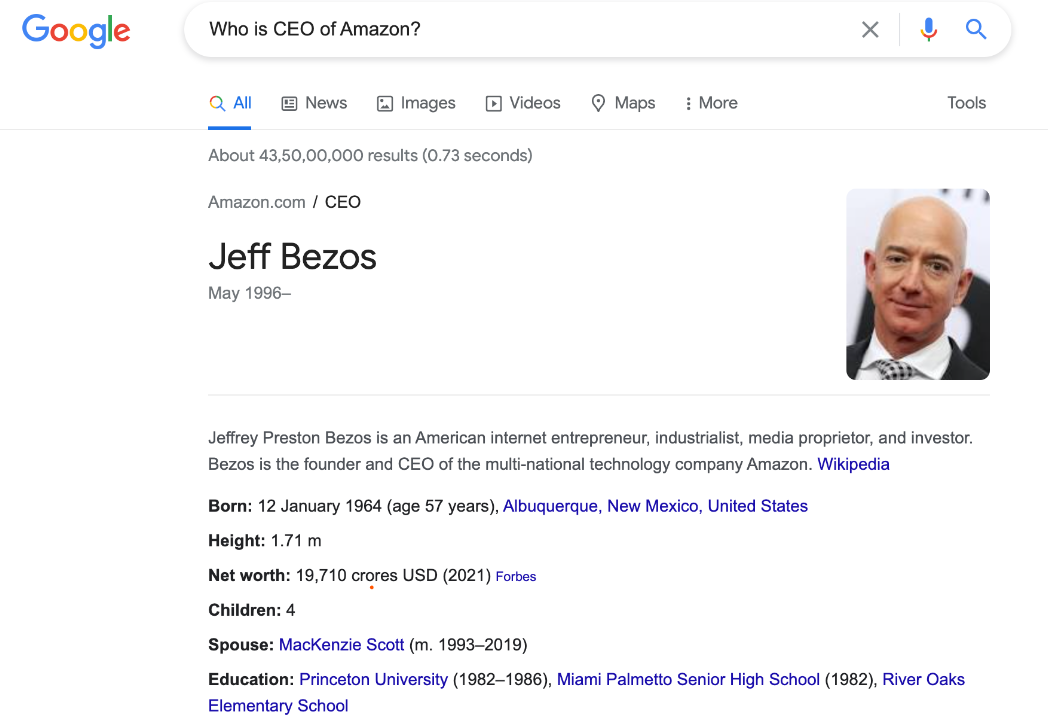

In [90]:
import spacy
import warnings
warnings.filterwarnings('ignore')

In [91]:
model = spacy.load("en_core_web_sm") #load pre-trained model

doc = "Sumit is an adjunct faculty at Upgrad. "

processed_doc = model(doc); #process input and perform NLP tasks

Since a named entity is a noun, let us see what information we get from using POS tags.

In [92]:
processed_doc.ents

(Upgrad,)

In [93]:
for token in processed_doc:
    
    print(token.text, '--', token.pos_)

Sumit -- NOUN
is -- AUX
an -- DET
adjunct -- ADJ
faculty -- NOUN
at -- ADP
Upgrad -- PROPN
. -- PUNCT


So we see that the POS tags for named entities are correctly identified. Let us see what the output of NER system in spacy is to understand the differences.

In [94]:
for ent in processed_doc.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Upgrad  --  31  --  37  --  ORG


Okay, so we did find some named entities, but clearly we missed the faculty name.

Let us build upon that example.

In [95]:
doc2 = "Dr. Sumit is an adjunct faculty at UpGrad"
processed_doc2 = model(doc2)

In [96]:
processed_doc2.ents

(Sumit, UpGrad)

In [97]:
for token in processed_doc2:
  print(token.text, " -- ", token.pos_)

Dr.  --  PROPN
Sumit  --  PROPN
is  --  AUX
an  --  DET
adjunct  --  ADJ
faculty  --  NOUN
at  --  ADP
UpGrad  --  PROPN


In [98]:
for entity in processed_doc2.ents:
    print(entity.text,'--', entity.start_char, '--', entity.end_char,'--', entity.label_)

Sumit -- 4 -- 9 -- PERSON
UpGrad -- 35 -- 41 -- ORG


Now the NER system was able to correctly identify the faculty name from the input sentence.

In [99]:
doc3 = "Statue of Liberty is situated in New York, USA."
processed_doc3 = model(doc3)

In [100]:
for tok in processed_doc3:
    print(tok.text, '--', tok.pos_)

Statue -- PROPN
of -- ADP
Liberty -- PROPN
is -- AUX
situated -- VERB
in -- ADP
New -- PROPN
York -- PROPN
, -- PUNCT
USA -- PROPN
. -- PUNCT


**Note**

In this example, that using a sequence of POS tags is not always sufficient. There are numerous variations in real life that are not always possible to anticipate beforehand and train your models or create rules accordingly.

In [101]:
for entity in processed_doc3.ents:
    print(entity.text,'--', entity.start_char, '--', entity.end_char,'--', entity.label_)

New York -- 33 -- 41 -- GPE
USA -- 43 -- 46 -- GPE


Finally, let us see the output of NER at token level illustrating the IOB format discussed in lectures.

In [102]:
for token in processed_doc3:
  print(token.text, " -- ", token.ent_iob_, " -- ", token.ent_type_)

Statue  --  O  --  
of  --  O  --  
Liberty  --  O  --  
is  --  O  --  
situated  --  O  --  
in  --  O  --  
New  --  B  --  GPE
York  --  I  --  GPE
,  --  O  --  
USA  --  B  --  GPE
.  --  O  --  


* You can use spacy's NER model to identify named entities in input text.
* You also studied some cases where the model is not able to correctly identify all the entities invovled.
* There are various situations where systems make errors and depending on the appliation and the severity and types of errors, follow up corrective measures can be employed (manual validation, discarding erroneous outouts, using heuristics, etc.)

Let us now consider one practical application of NER systems -- Anonymization of data and redacting personally indentifying information.

In many scenarios, we want to withheld sensitive information such as names of persons in various confidential information.
We can use NER methods to automatically identify PERSONS in text and remove PERSON names from text.
Let us see how it can be done with what we have learnt till now. We take an example email from Enron e-mail dataset for ilustration in this demo.

E-mail source:
http://www.enron-mail.com/email/lay-k/elizabeth/Christmas_in_Aspen_4.html

Complete Enron data:
http://www.enron-mail.com/

In [103]:
email = ('Dear Family, Jose Luis and I have changed our dates, we are '
         'going to come to Aspen on the 23rd of December and leave on the '
         '30th of December. We would like to stay in the front bedroom of '
         'the Aspen Cottage so that Mark, Natalie and Zachary can stay in '
         'the guest cottage. Please let me know if there are any problems '
         'with this. If I do not hear anything, I will assume this is all '
         'o.k. with you.'
         'Love, Liz')

In [104]:
processed_email = model(email) # Apply spacy's model to process the email

In [105]:

anonymized_email = list(email) # intialize data structure to store anonymized email

for ent in processed_email.ents:
  if(ent.label_ == 'PERSON'): # if the word corresponds to a PERSON entity
    for char_pos in range(ent.start_char, ent.end_char): # use character positions
      anonymized_email[char_pos] = '*'

print("\n\n-- After Anonymization--\n")
"".join(anonymized_email)



-- After Anonymization--



'Dear Family, ********* and I have changed our dates, we are going to come to Aspen on the 23rd of December and leave on the 30th of December. We would like to stay in the front bedroom of the Aspen Cottage so that ****, ******* and ******* can stay in the guest cottage. Please let me know if there are any problems with this. If I do not hear anything, I will assume this is all o.k. with you.Love, ***'

**Question:**

Suppose you are given the following message, and you want to hide the dates mentioned in this message. In order to hide the dates, you replace them with the ‘#’ symbol whenever a date appears.

Message: 

‘Dear Family,
Jose Luis and I have changed our dates, we are going to come to Aspen on the 23rd of December and leave onthe 30th of December. We would like to stay in the front bedroom of the Aspen Cottage so that Mark Natalie and Zachary can stay in the guest cottage.
Please let me know if there are any problems with this. If I do not hear anything, I will assume this is all o.k. with you.
Love,
Liz ’

In [106]:
message = ('Dear Family, Jose Luis and I have changed our dates,' 
           'we are going to come to Aspen on the 23rd of December and'
           'leave onthe 30th of December. We would like to stay in the front bedroom'
           'of the Aspen Cottage so that Mark Natalie and Zachary can stay in the guest cottage.'
           'Please let me know if there are any problems with this. If I do not hear anything,'
           'I will assume this is all o.k. with you. Love, Liz ')

processed_msg = model(message)

In [107]:
anonymized_msg = list(processed_msg)

In [108]:
# for ent in processed_email.ents:
#     if(ent.label_ == 'DATE'): 
#         for char_pos in range(ent.start_char, ent.end_char): # use character positions
#             anonymized_msg[char_pos] = '#'

**Question:**

Considering we are using the Spacy library, which of the following code snippets would identify the entities in the given sentence?

‘Mr. Kenneth L. Lay, Chairman and CEO of Enron Corp. will not be able to
attend the November 16 - 17, 2000 6th Olympiad of the Mind.’

In [109]:
model = spacy.load('en_core_web_sm')
doc3 = "Mr. Kenneth L. Lay, Chairman and CEO of Enron Corp. will not be able to attend November 16,"
processed_doc3 = model(doc3)
for ent in processed_doc3.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Kenneth L. Lay  --  4  --  18  --  PERSON
Enron Corp.  --  40  --  51  --  ORG
November 16  --  79  --  90  --  DATE


**Question:**

What will be the NER tag of the word ‘Jaguar’ in the following two sentences, given that you are using Spacy? (Note: More than one option may be correct.)

S1: ‘I drove away in my Jaguar.’<br>
S2: ‘The deer ran away seeing the Jaguar.’
 

In [110]:
model = spacy.load("en_core_web_sm") #load pre-trained model
doc = "I drove away in my Jaguar."
processed_doc = model(doc) #process input and perform NLP tasks

for ent in processed_doc.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Jaguar  --  19  --  25  --  ORG


In [111]:
model = spacy.load("en_core_web_sm") #load pre-trained model
doc = "The deer ran away seeing the Jaguar."
processed_doc = model(doc) #process input and perform NLP tasks

for ent in processed_doc.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Jaguar  --  29  --  35  --  ORG


# **CRF(Conditional Random Field)**

The Conditional Random Field (CRF) can be used as a sequence labelling technique for performing NER tagging. CRF is used to perform custom NER.

 

Conditional Random Fields are the class of probabilistic models. There are two terms in the CRF nomenclature that you need to keep in mind, which are as follows:

* **Random fields:** These indicate that the CRF is probability a distribution-based machine learning model.
* **Conditional:** This indicates that the probabilities are conditional probabilities.

The model building activity is to have some features to feed into the model. To get some features for this data set, it is necessary to define the feature functions for this data set.

So, we defined three feature functions for this example, which are as follows:


* **f1 (X, xi, xi-1, i) = 1 if xi= Xx+; otherwise, 0 (Words starting with an uppercase letter)**
* **f2 (X, xi, xi-1, i) = 1 if xi= Noun and xi-1 is Noun; otherwise, 0 (Continuous entity)**
* **f3 (X, xi, xi-1, i) = 1 if xi = Inc and xi-1 = B-Org; otherwise, 0 (Company names often end with Inc.)**

1. The f1 feature indicates that if a particular word in the given sentence starts with an uppercase letter, then assign 1 as the value of f1; otherwise, assign 0 as the value of f1 to this word. 
2. The f2 feature indicates that if a particular word in the given sentence has a PoS tag of noun and the word before it also has a PoS tag of noun, then assign 1 as the value of f2 as to this word; otherwise, assign 0 as the value of f2 to this word.
3. The f3 feature indicates that if a particular word in the given sentence is ‘Inc’ and the word before it has the NER tag of B-ORG, then assign 1 the value of f3 to this word; otherwise, assign 0 as the value of f3 to this word.


**So, the model considers all the possible combinations of IOB tags of the given training example and calculates the scores of each combination using the weights corresponding to each feature function. The model starts the computation by taking any random initial weights for each feature function and iteratively modifies the weights until it reaches a stage where the score of the correct IOB tag sequence is the highest.**

For this demo, we will use the MIT Restaurant Corpus -- a dataset of transcriptions of spoken utterances about restaurants.

The dataset has following entity types:

'B-Rating'

'I-Rating',

'B-Amenity',

'I-Amenity',

'B-Location',

'I-Location',

'B-Restaurant_Name',

'I-Restaurant_Name',

'B-Price',

'B-Hours',

'I-Hours',

'B-Dish',

'I-Dish',

'B-Cuisine',

'I-Price',

'I-Cuisine'

Let us load the dataset and see what are we working with.

In [112]:
with open('/kaggle/input/restaurant-dataset/sent_train.txt', 'r') as train_sent_files:
    
    train_sent = train_sent_files.readlines()
    
with open('/kaggle/input/restaurant-dataset/label_train.txt', 'r') as train_label_files:
    
    train_label = train_label_files.readlines()
    
with open('/kaggle/input/restaurant-dataset/sent_test.txt', 'r') as test_sent_files:
    
    test_sent = test_sent_files.readlines()

with open('/kaggle/input/restaurant-dataset/label_test.txt', 'r') as test_label_files:
    
    test_label = test_label_files.readlines()

Let us see some example data points.

In [113]:
print(train_sent[5])

print(train_label[5])

a place that serves soft serve ice cream 

O O O O B-Dish I-Dish I-Dish I-Dish 



## Defining Features for Custom NER

In [114]:
!pip install pycrf
!pip install sklearn-crfsuit

  Preparing metadata (setup.py) ... - \ done
  Created wheel for pycrf: filename=pycrf-0.0.1-py3-none-any.whl size=1896 sha256=8163f24c67f513b99ac65154f6c15b89464728256afcb4627288620e7ec3f135
  Stored in directory: /root/.cache/pip/wheels/fd/3a/fb/e4d15c9c2b169f43811b23a863ee9717ff3eda5d2301789043
Successfully built pycrf
ERROR: Could not find a version that satisfies the requirement sklearn-crfsuit (from versions: none)
ERROR: No matching distribution found for sklearn-crfsuit


In [115]:
pip --version

pip 23.1.2 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.


We will now start with computing features for our input sequences.

We have defined the following features for CRF model building:

f1 = input word is in lower case;<br>
f2 = last 3 characters of word;<br>
f3 = last 2 characers of word;<br>
f4 = 1; if the word is in uppercase, 0 otherwise;<br>
f5 = 1; if word is a number; otherwise, 0<br>
f6= 1; if the word starts with a capital letter; otherwise, 0

In [116]:
def getFeaturesForOneWord(sentence, position):
    
    word = sentence[position]
    
    features = [
        
        'word_lower=' + word.lower(), #Serve as word ID
        'word[-3:]='  + word[-3:], #Last Three characters
        'word[-2:]='  + word[-2:], #Last Two Characters
        'word.isupper =%s' %word.isupper(), #Is the Word in all Upper Case
        'word.isdigit = %s'%word.isdigit(), #Is the word is a digit
        'words.startswithcapital=%s' %word[0].isupper() #Is word starting with capital
        
    ]
    
    if position>0: # Then extract teh features of Previous word as well
        
        previous_word = sentence[position-1]
        
        features.extend([
        
        'previous_word.lower=' + previous_word.lower(),
        'previous_word.isupper=%s' % + previous_word.isupper(),
        'previous_word.isdigit=%s' % + previous_word.isdigit(),
        'previous_word.startsWithCapital=%s' %+previous_word[0].isupper()
        
        ])
        
    else:
        
        features.append('BEG')
        
    if(pos == len(sentence)-1):
        features.append('END') # feature to track end of sentence

        return features


## Computing Features

Define a function to get features for a sentence using the already defined 'getFeaturesForOneWord' function

In [117]:
# Define a function to get features for a sentence 
# using the 'getFeaturesForOneWord' function.
def getFeaturesForOneSentence(sentence):
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, position) for position in range(len(sentence_list))]


In [118]:
# Define a function to get the labels for a sentence.

def getLabelsInListForOneSentence(labels):
    return labels.split()

In [119]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 5 in train_sentences

example_sentence = train_sent[5]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[2]

a place that serves soft serve ice cream 

